In [2]:
!pip install geopandas
!pip install contextily

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
# Visualizing Singapore study area
import geopandas as gpd
from shapely.geometry import Polygon
import contextily as cx
from geopy.geocoders import Nominatim

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.collections import PatchCollection
from matplotlib.patches import Patch, Rectangle

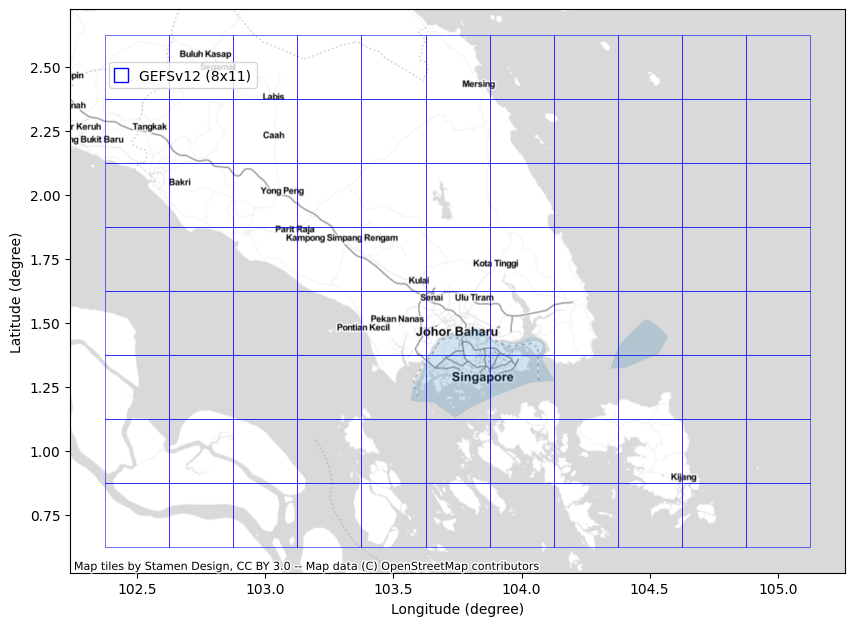

In [6]:
def plot_grid(ax, lon, lat, width, length, edgecolor, lw, point=False):
    
    boxes = [Rectangle((x - width/2, y - length/2), width, length)
                      for x, y in zip(lon.ravel(), lat.ravel())]
    data = PatchCollection(boxes, facecolor='none',edgecolor=edgecolor, lw=lw)
    # Add collection to axes
    ax.add_collection(data)
    if point==True:
        ax.scatter(lon.ravel(), lat.ravel(),color=edgecolor)


fig, ax = plt.subplots(figsize=(10,10))
# GEFS
lon_GEFS = np.linspace(102.5, 105, 11)
lat_GEFS = np.linspace(0.75, 2.5, 8)
lon, lat = np.meshgrid(lon_GEFS, lat_GEFS)
GEFS_setting = {'lon':lon, 'lat':lat, 'ax':ax, 'width':0.25, 'length':0.25, 'edgecolor':'b', 'lw':0.4, 'point':False}

for setting in [GEFS_setting]:
    plot_grid(**setting)

# Plot
# get returning a full geometry data
location = lambda row: Nominatim(user_agent='google').geocode(row, geometry='geojson', timeout=10)
dic = location('Singapore').raw['geojson']
df = pd.DataFrame(dic)
df['coordinates'] = [Polygon(i[0]) for i in df['coordinates']]
gdf = gpd.GeoDataFrame(df, crs="EPSG:4326", geometry='coordinates')
gdf.plot(ax=ax, alpha=0.2)
cx.add_basemap(ax, crs=gdf.crs,source=cx.providers.Stamen.TonerLite)

legend_elements = [Patch(facecolor='none', edgecolor='b',
                         label='GEFSv12 (8x11)')]

ax.legend(handles=legend_elements,loc=(0.05,0.86), ncol=1, handlelength=1, handleheight=1.125)
plt.xlabel('Longitude (degree)')
plt.ylabel('Latitude (degree)');
plt.savefig('selected_WRF.png',dpi=1200,bbox_inches='tight') 